In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
from tensorflow.keras import regularizers 
import tensorflow.keras.utils as ku 
import numpy as np 

In [28]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0] #只取 每一行text的第一个单词对应的token 
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
print(len(input_sequences))

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(input_sequences.shape)
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-12-26 18:13:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-12-26 18:13:28 (142 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]

15462
(15462, 11)


In [26]:

# input_sequences = []

# line = corpus[0]

# token_list = tokenizer.texts_to_sequences([line])[0]
# 	# for i in range(1, len(token_list)):
# n_gram_sequence = token_list[:1+1]
# input_sequences.append(n_gram_sequence)
# print(corpus[0])
# print(line[0])
# print(token_list)
# print(n_gram_sequence)

from fairest creatures we desire increase,
f
[34, 417, 877, 166, 213, 517]
[34, 417]


In [30]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length= max_sequence_len -1))
model.add(Bidirectional(LSTM(150,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 1605)              322605    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,422,571
Trainable params: 6,422,571
Non-trainable params: 0
____________________________________________

In [31]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 30s 2ms/sample - loss: 6.9807 - acc: 0.0228
Epoch 2/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.5058 - acc: 0.0235
Epoch 3/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.3976 - acc: 0.0243
Epoch 4/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.2803 - acc: 0.0311
Epoch 5/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.1924 - acc: 0.0367
Epoch 6/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.1029 - acc: 0.0392
Epoch 7/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.0038 - acc: 0.0420
Epoch 8/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 5.8955 - acc: 0.0466
Epoch 9/100
15462/15462 [==============================] - 

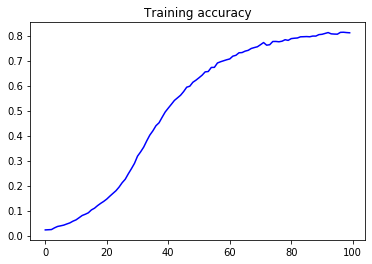

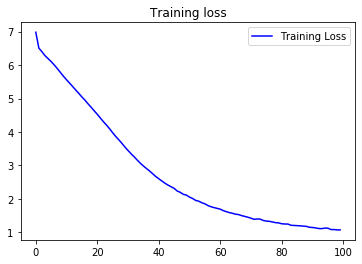

In [32]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [35]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope and break of ghastly night days light light light torn ' ' room clears clears swerving mad had purge despised 'i complexion cold rage hour body's night dead days ' ' had hence ' live brought to razed dun grow shines so rare face doth woe woe ' back back on thee well 'i glory sad doom no parts dead night days light light light torn go days ' ' shall behold with thee time's precious buds is new need delight days ' ' new ' had me did bring razed now bear you date night new pride days '
